# PAUTA Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [4]:
library(kohonen)
set.seed(7)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("c:\\milk.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

Warning message:
"package 'kohonen' was built under R version 3.6.2"


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

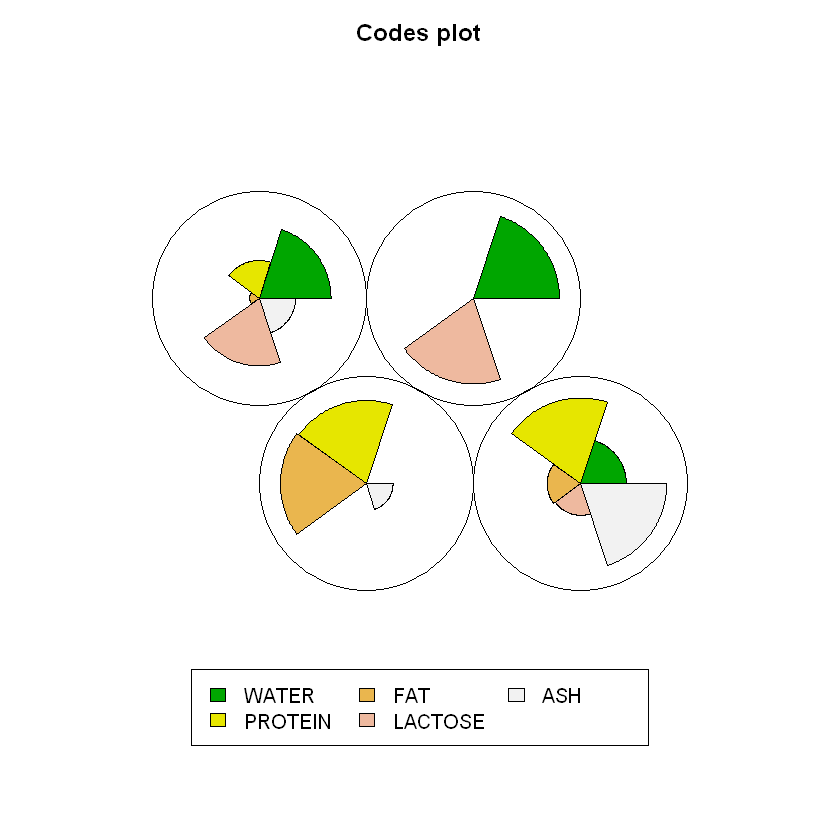

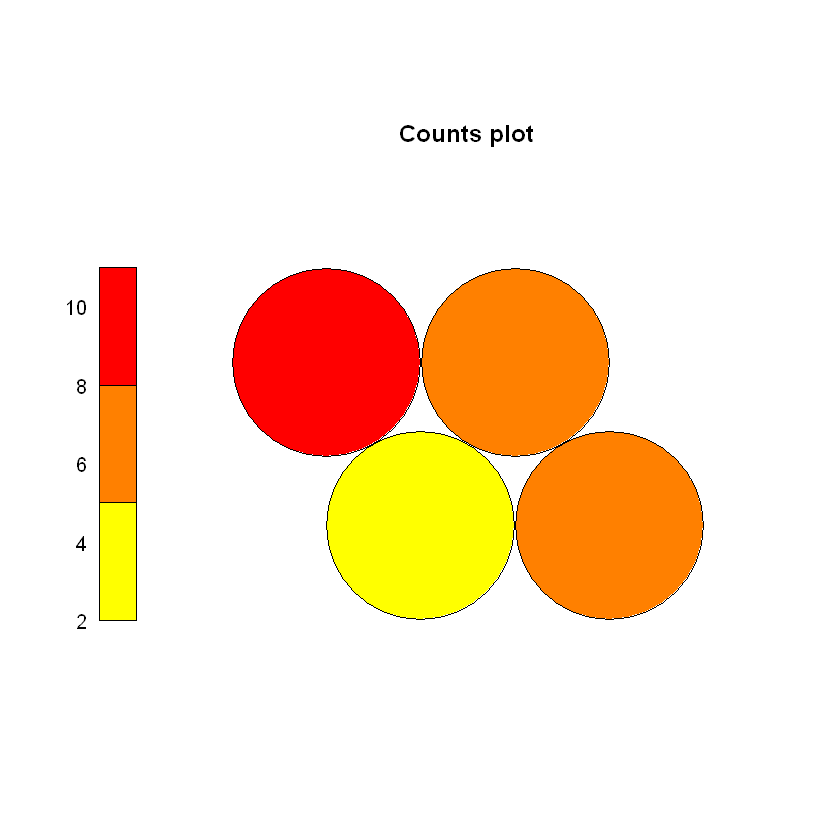

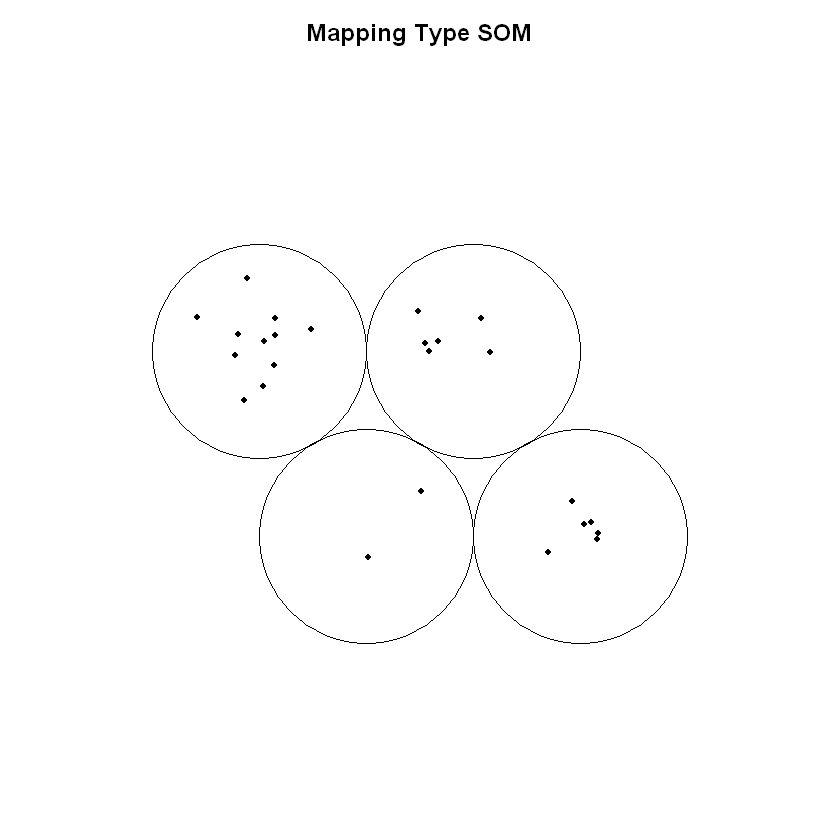

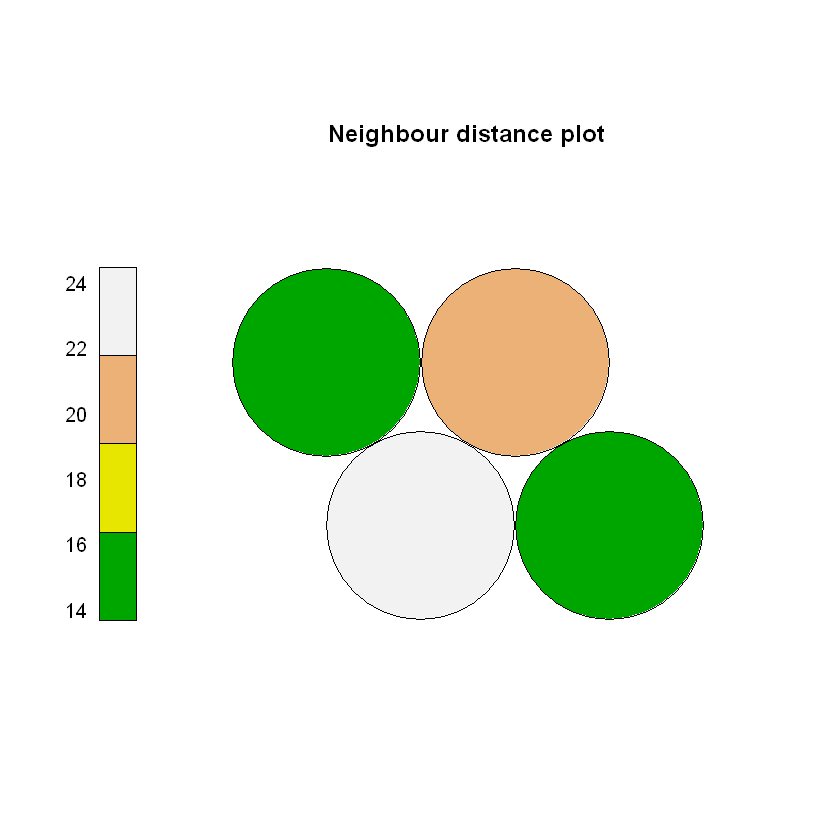

In [5]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

**Respuesta** 
**(a)**
El método som ajusta una red neuronal pre-alimentada, cuya salida es un mapa característico en 2D (compuesto de una malla de nodos)y la entradas son datos de alta dimensionalidad. Para ello utiliza el algoritmo de autoorganización de kohonen y la distancia euclidiana entre los nodos del mapa característico.
Los principales parámetros del método son:
- data: matriz en que cada fila representa una observación
- grid: el tipo de malla en el mapa característico
- rlen: el número de veces que el conjunto entero de datos es utilizado para ajustar la red neuronal. Por omisión es 100.
- alpha: tasa de aprendizaje, vector con el rango en cual variar linealmente la tasa de aprendizaje
- radius: radio de activación 
- init: valores iniciales de los pesos de la red. Por omisión se escogen aleatorios en el rango de los datos.

La salida es un objeto de la clase kohonen, cuyas principales componentes son:
   
- grid: la malla, un objeto de la clase "somgrid".
- codes: una matriz con los pesos de  cada nodo del mapa caracerístico
- changes: un vector con la media de las distancias entre nodos vecinos en cada iteración. Representan una medida del ajuste de la red. 
- unit.classif: nodos activados por cada observación. Sólo se retorna si keep.data == TRUE.
- distances: distancia de la observación al nodo activado.  Sólo se retorna si keep.data == TRUE.


Los gráficos desplegados muestra respectivamente:
1) los pesos de cada variable en los nodos (codes)
2) el número de observaciones por nodo (el nodo que se activa con dicha observación)
3) el lugar dónde se ubican las distintas observaciones respecto de cada nodo en el mapa característico
4) la distancia entre nodos del mapa  característico

**(b)** Es posible graficar changes, variando el valor de rlen y podemos ver que en este caso se logra convergencia con 150 iteraciones.
Distintas configuraciones del mapa, representan mas o menos grupos a definir.

[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1 -2.5393951  1.0807384  2.6685182 -2.00485456 -0.34974390
V2  0.1753471  0.2355831 -0.2561389  0.01958219  0.09198594
V3  0.8140063 -1.0436021 -0.7101601  0.87782703 -0.82382729
V4 -0.7999640  1.2397146  0.6663364 -0.96301138  1.55307888

 [1] 3 3 3 3 3 3 3 2 2 2 2 3 3 2 3 2 2 2 4 4 4 4 4 1 1


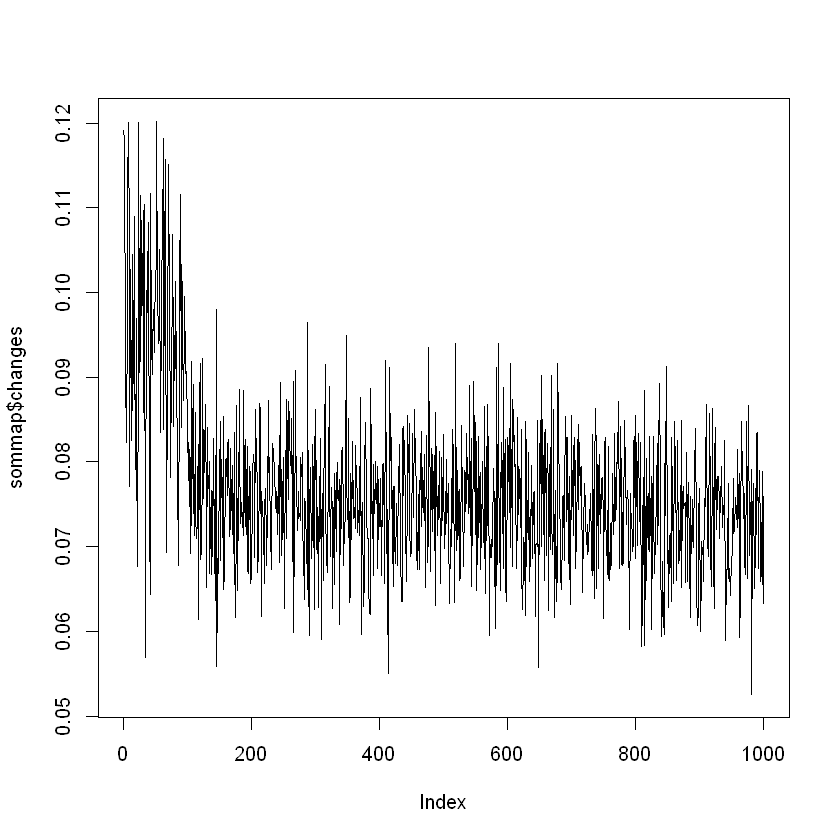

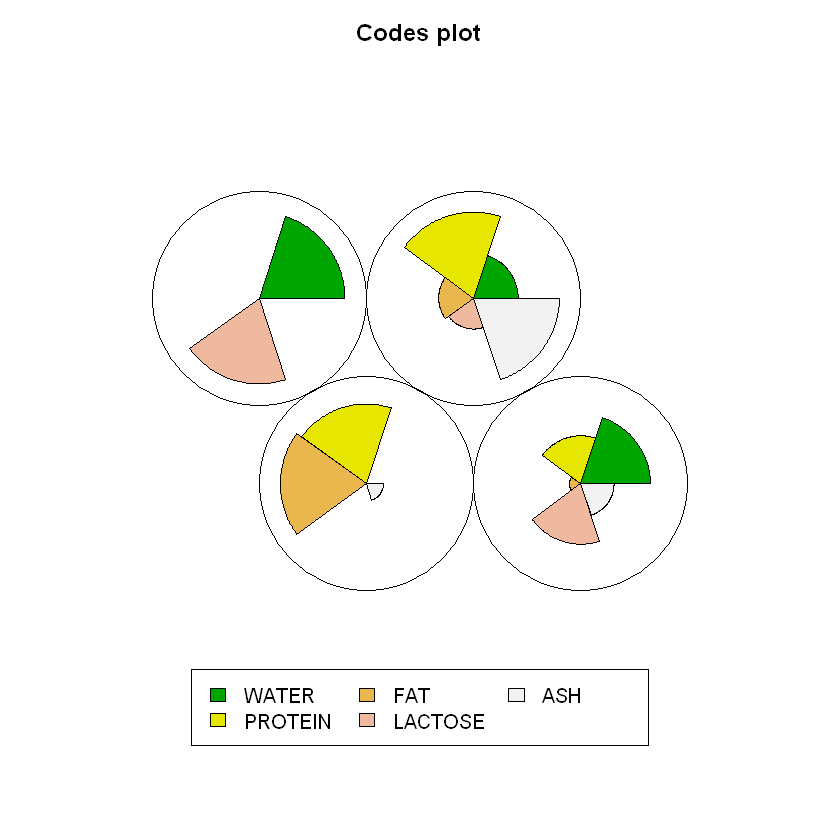

In [7]:
##create SOM grid
sommap <- som(scale(datos),rlen=1000, grid = somgrid(2, 2, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)


[[1]]
         WATER    PROTEIN         FAT    LACTOSE         ASH
V1  -0.4405876  0.8208251  0.21654501 -0.4580389  1.06310257
V2   0.3074447  0.5231002 -0.39202819 -0.3048718  0.08741971
V3   0.3017971 -0.1245153 -0.29682466  0.3100725 -0.04223385
V4   0.6958933 -0.7968800 -0.60389201  0.4731485 -0.31132966
V5  -0.5372350  1.6664159  0.26573773 -1.2182460  2.84501237
V6  -0.1491149  0.8452397 -0.07469239 -0.6167808  0.67001627
V7   0.2665123  0.1062455 -0.41901054  0.4189371  0.13223794
V8   0.6678889 -0.4818796 -0.76320287  0.8348018 -0.00374988
V9  -1.0162119  1.2434886  0.96384366 -1.0593567  1.28858826
V10 -0.5829232 -0.7136764  0.69208114  0.8000993 -0.46082409
V11  0.7019588 -0.9482370 -0.59766838  0.7819692 -0.84251491
V12  0.9217305 -1.1531597 -0.80875493  0.7469462 -0.77920461
V13 -2.5431111  1.0885647  2.64707688 -1.9892490 -0.36987632
V14 -1.3975688  0.5123389  1.49789095 -0.9192017 -0.12786969
V15  0.9526684 -1.5358622 -0.55239008  0.1482712 -1.51109682
V16  0.8704640 -1.

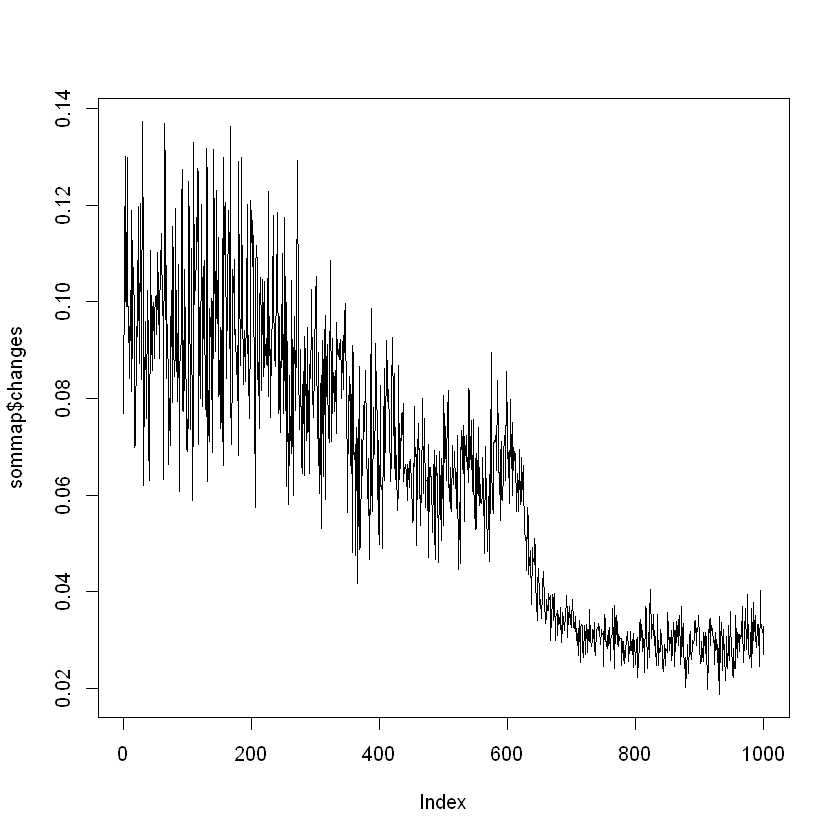

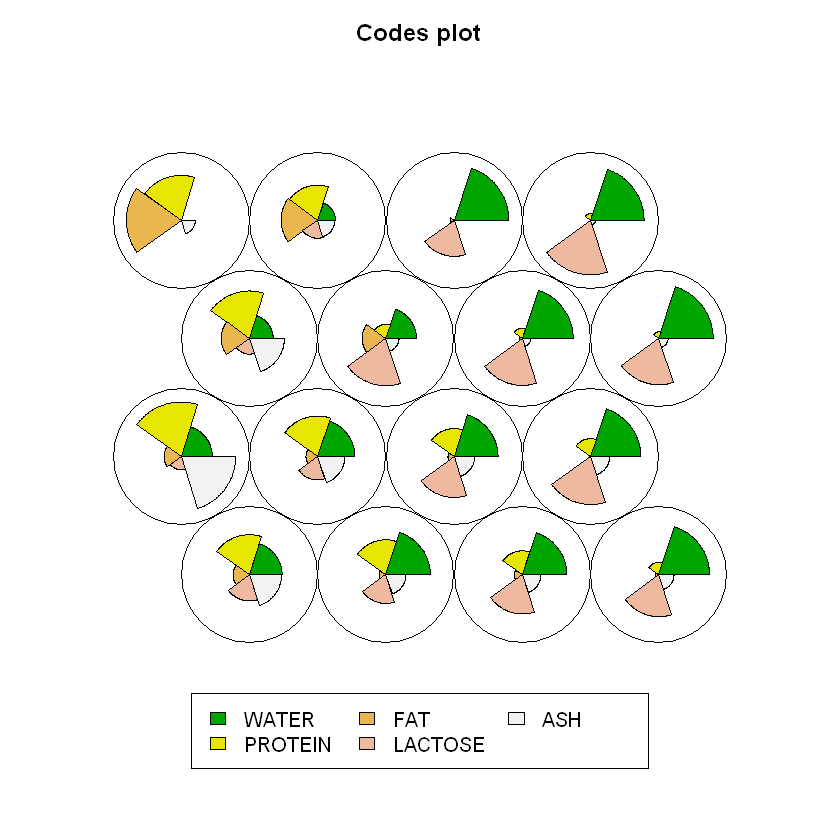

In [8]:
sommap <- som(scale(datos),rlen=1000, grid = somgrid(4,4, "hexagonal"), keep.data=TRUE)
print(sommap$codes)
plot(sommap$changes, type="l")
print(sommap$unit.classif)

plot(sommap)

            [,1]       [,2]        [,3]       [,4]        [,5]
 [1,] -0.4405876  0.8208251  0.21654501 -0.4580389  1.06310257
 [2,]  0.3074447  0.5231002 -0.39202819 -0.3048718  0.08741971
 [3,]  0.3017971 -0.1245153 -0.29682466  0.3100725 -0.04223385
 [4,]  0.6958933 -0.7968800 -0.60389201  0.4731485 -0.31132966
 [5,] -0.5372350  1.6664159  0.26573773 -1.2182460  2.84501237
 [6,] -0.1491149  0.8452397 -0.07469239 -0.6167808  0.67001627
 [7,]  0.2665123  0.1062455 -0.41901054  0.4189371  0.13223794
 [8,]  0.6678889 -0.4818796 -0.76320287  0.8348018 -0.00374988
 [9,] -1.0162119  1.2434886  0.96384366 -1.0593567  1.28858826
[10,] -0.5829232 -0.7136764  0.69208114  0.8000993 -0.46082409
[11,]  0.7019588 -0.9482370 -0.59766838  0.7819692 -0.84251491
[12,]  0.9217305 -1.1531597 -0.80875493  0.7469462 -0.77920461
[13,] -2.5431111  1.0885647  2.64707688 -1.9892490 -0.36987632
[14,] -1.3975688  0.5123389  1.49789095 -0.9192017 -0.12786969
[15,]  0.9526684 -1.5358622 -0.55239008  0.1482712 -1.5

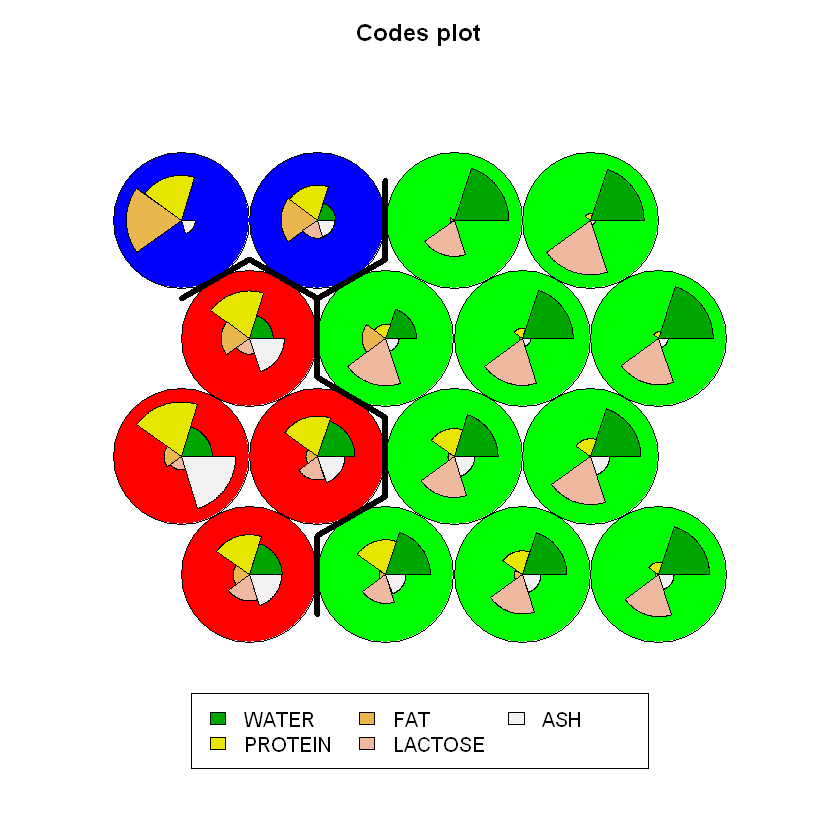

In [11]:
mat <- matrix(sommap$codes[[1]],nrow=16,ncol=5)
print(mat)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)
print(som.hc)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)



Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

b) Interprete y comente los resultados obtenidos. 

**Respuesta**

**(a)** Esta visualización es útil cuando se ha generado un mapa característico con muchos nodos y se quiere recuperar un agrupamiento con menor número de grupos.

**(b)** En el caso del ejemplo, si utilizamos 3 grupos, se recuperan las características de los mismos grupos logrados con los otros métodos

Ejercicio 3: 

a) De los datos en el archivo comunas.csv escoja un subconjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones, discuta sus resultados y proponga una estrategia gráfica para representarlos.

**No considera pauta, pues depende de los datos utilizados**

Respecto a la estrategia de representación gráfica, si se cuenta con un software gráfico para representar las comunas, la idea sería poder coloréarlas según el grupo al que pertenecen.